In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1
carga todos los archivos que empieza por "data_" y juntalos en un solo DataFrame de pandas. 

IMPORTANTE: es obligatorio el uso de `for` en este ejercicio. NO PUEDES CARGAR TODOS LOS DATAFRAMES EN LINEAS SEPARADAS Y JUNTARLOS DESPUES

In [3]:
codigos = ['AFG', 'SOM', 'NGA', 'NER', 'MOZ', 'MLI', 'LBR', 'BDI', 'LAO', 'SSD','HTI', 'GNB', 'GMB', 'TCD', 'COD', 'CMR', 'CAF', 'BFA', 'SDN', 'MMR','YEM', 'SYR', 'COG', 'IRQ', 'LBN']

In [5]:
df = None

for data in codigos:
    nombre_archivo = f'data_{data}.csv'
    ruta = pd.read_csv(f"./data/{nombre_archivo}")
    if df is None:
        df = ruta
    else:
        df = pd.concat([df, ruta])
df.head(5)

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


# Ejercicio 2

Una vez cargado, dime que dimension tiene, cuales son los valores extremos, y dime el rango existente entre la media y la mediana. 

In [16]:

df.describe(), df.shape


(              Open         High          Low        Close    Inflation
 count  4734.000000  4734.000000  4734.000000  4734.000000  4434.000000
 mean      1.491880     1.536158     1.451056     1.492398    14.692346
 std       4.652457     4.883312     4.439229     4.633321    35.910342
 min       0.010000     0.010000     0.010000     0.010000   -31.470000
 25%       0.740000     0.750000     0.720000     0.740000    -0.487500
 50%       0.960000     0.980000     0.950000     0.960000     5.360000
 75%       1.100000     1.120000     1.077500     1.100000    16.372500
 max     102.460000   106.480000    94.420000    94.420000   363.100000,
 (4798, 8))


# Ejercicio 3

Pinta en una gráfica todos los valores del campo `Close` del dataframe, haciendo distición entre el pais (Separados en diferentes líneas correctamente especificadas en una leyenda).  
Puedes usar matplotlib, seaborn o plotly. 

In [33]:
df = df.reset_index(drop=True)

<Axes: xlabel='date', ylabel='Close'>

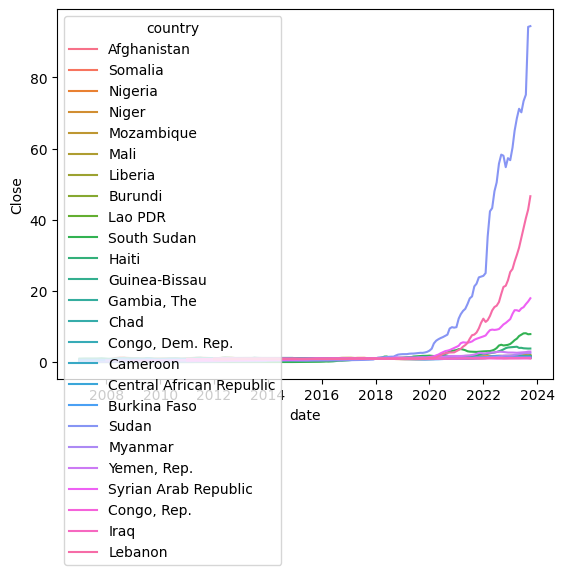

In [34]:
import seaborn as sns
sns.lineplot(data=df,x="date", y="Close", hue="country")

# Ejercicio 4

Agrupa el dataframe por pais, y selecciona los valores medios de las columnas nuevas.

Guarda este dataframe en una variable y llamala como quieras

In [13]:
# Asegurarse de que las columnas numéricas contengan solo valores numéricos
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Inflation']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Eliminar filas no numéricas
df = df.dropna(subset=numeric_columns)

# Calcular la media de las columnas numéricas excluyendo 'ISO3'
df_grouped = df.groupby('country')[numeric_columns].mean().reset_index()

df_grouped

,country,Open,High,Low,Close,Inflation
0,Afghanistan,1.018737,1.029947,1.008158,1.018421,7.585579
1,Burkina Faso,0.950842,0.978053,0.925684,0.951632,8.713789
2,Burundi,0.924053,0.948789,0.900000,0.924579,8.850684
3,Cameroon,1.022914,1.026821,1.018477,1.023046,2.789272
4,Central African Republic,0.944947,0.978211,0.914947,0.949368,6.324526
5,Chad,1.068211,1.097842,1.038158,1.067263,4.592000
6,"Congo, Dem. Rep.",0.958105,0.974526,0.941895,0.957632,7.071737
7,"Congo, Rep.",0.948662,0.962254,0.935775,0.949718,1.503239
8,"Gambia, The",0.896474,0.907842,0.885421,0.897211,6.809053
9,Guinea-Bissau,1.104789,1.138526,1.073421,1.105947,2.365947


# Ejercicio 5

Carga el archivo `detalles.csv` en un nuevo dataframe y mergealo (haz un join) con el dataframe anterior (el del ejercicio 4). Elije tu el campo por el que hacer el join y justifica su respuesta.

Guarda este join en un nuevo dataframe. Llamalo como quieras. 

# Ejercicio 6

Querys: 

- Cual es el país que tiene el valor más alto de `number_of_markets_modeled`
- Cual es el país que tiene el valor más cercano (o exacto) a la media de `number_of_food_items`
- Cual es el valor de `Close` del valor que tiene el valor más alto de `number_of_markets_covered`, y en caso de empate, el que además tiene el valor más bajo de `number_of_food_items`